In [1]:
from data_preparation import DataPreparator
from apply_clustering import ClusteringApplier

In [2]:
import pandas as pd
import numpy as np

import config
from itertools import chain, combinations

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [4]:
#df_observable = pd.read_excel('../data/biological_set_raw_data.xlsx')
#df_explainable = pd.read_excel('../data/biological_set_explaining_features.xlsx')

EXPLAINING_FEATURE_NAMES = list(config.EXPLAINING_FEATURE_NAMES.keys())

In [5]:
OBSERVED_FEATURES = list(config.OBSERVABLE_FEATURE_NAMES.keys())

In [9]:
def explore(observed_features, df_explainable):

    df_observable = DataPreparator.read_excel_sheet(
        config.INPUT_FILE_OBSERVABLE_FEATURES, observed_features
    )

    preparation_result = DataPreparator.prepare_data(
        use_config=False,
        df_observable=df_observable,
        df_explainable=df_explainable,
        distortion_mean=config.DISTORTION_MEAN,
        distortion_std=config.DISTORTION_STD,
        observed_features=observed_features,
        explaining_features=EXPLAINING_FEATURE_NAMES,
        nn_imputation_k=config.NN_IMPUTATION_K,
        group_name=config.GROUP_NAME
    )
    optimal_number_of_clusters = ClusteringApplier.draw_gap_statistic_plot(
        use_config=False,
        df_observable=preparation_result['observable_df'],
        observed_features=observed_features,
        gap_statistic_cluster_range=config.GAP_STATISTIC_CLUSTER_RANGE,
        plot=False
    )
    observable_patterns_result = ClusteringApplier.calculate_observable_patterns(
        use_config=False,
        df_observable_data=preparation_result['observable_df'],
        _n_clusters=optimal_number_of_clusters['n_clusters'],
        observable_name=config.OBSERVABLE_NAME,
        observable_feature_names=observed_features,
        plot_title=config.OBSERVABLE_PATTERN_NAME_PLURAL,
        number_observable_patterns='auto',
        distance_measure_fingerprint=config.DISTANCE_MEASURE_FINGERPRINT,
        group_name=config.GROUP_NAME, 
        plot=False
    )
    calculate_explainable_distances_result = ClusteringApplier.calculate_explainable_distances(
        use_config=False,
        df_explainable=preparation_result['explainable_df'].copy(),
        df_observable_distances=observable_patterns_result['pw_norm_dist'].copy(),
        explaining_features=EXPLAINING_FEATURE_NAMES,
        method=config.INFERENCE_MODE_EXPLAINING_FEATURES,
        distance_measure=config.DISTANCE_MEASURE_EXPLAINABLE_FEATURES,
        sparsity_parameter=config.SPARSITY,
        max_num_threads=config.MAX_NUM_THREADS,
        group_name=config.GROUP_NAME,
        plot=False
    )
    result = calculate_explainable_distances_result['overview_df'].iloc[0].correlation
    return result

In [10]:
powerset_observations = chain.from_iterable(
    combinations(OBSERVED_FEATURES, r) for r in range(2, len(OBSERVED_FEATURES) + 1)
)

df_explainable = DataPreparator.read_excel_sheet(
    config.INPUT_FILE_EXPLAINING_FEATURES, EXPLAINING_FEATURE_NAMES
)

result_dict = {}
n_iter = 2**len(OBSERVED_FEATURES) - len(OBSERVED_FEATURES) - 1
print(f'{n_iter} Iterations')
for observations in powerset_observations:
    observed_features = list(observations)
    res = explore(
        observed_features=observed_features,
        df_explainable=df_explainable
    )
    result_dict[res] = observed_features

  0%|          | 0/1023 [00:00<?, ?it/s]

  0%|          | 0/1023 [00:00<?, ?it/s]

  0%|          | 0/1023 [00:00<?, ?it/s]

  0%|          | 0/1023 [00:00<?, ?it/s]

  0%|          | 0/1023 [00:00<?, ?it/s]

  0%|          | 0/1023 [00:00<?, ?it/s]

  0%|          | 0/1023 [00:00<?, ?it/s]

  0%|          | 0/1023 [00:00<?, ?it/s]

  0%|          | 0/1023 [00:00<?, ?it/s]

  0%|          | 0/1023 [00:00<?, ?it/s]

  0%|          | 0/1023 [00:00<?, ?it/s]

In [26]:
inv_result_dict = {}
for k, v in result_dict.items():
    inv_result_dict[str(v)] = [k]

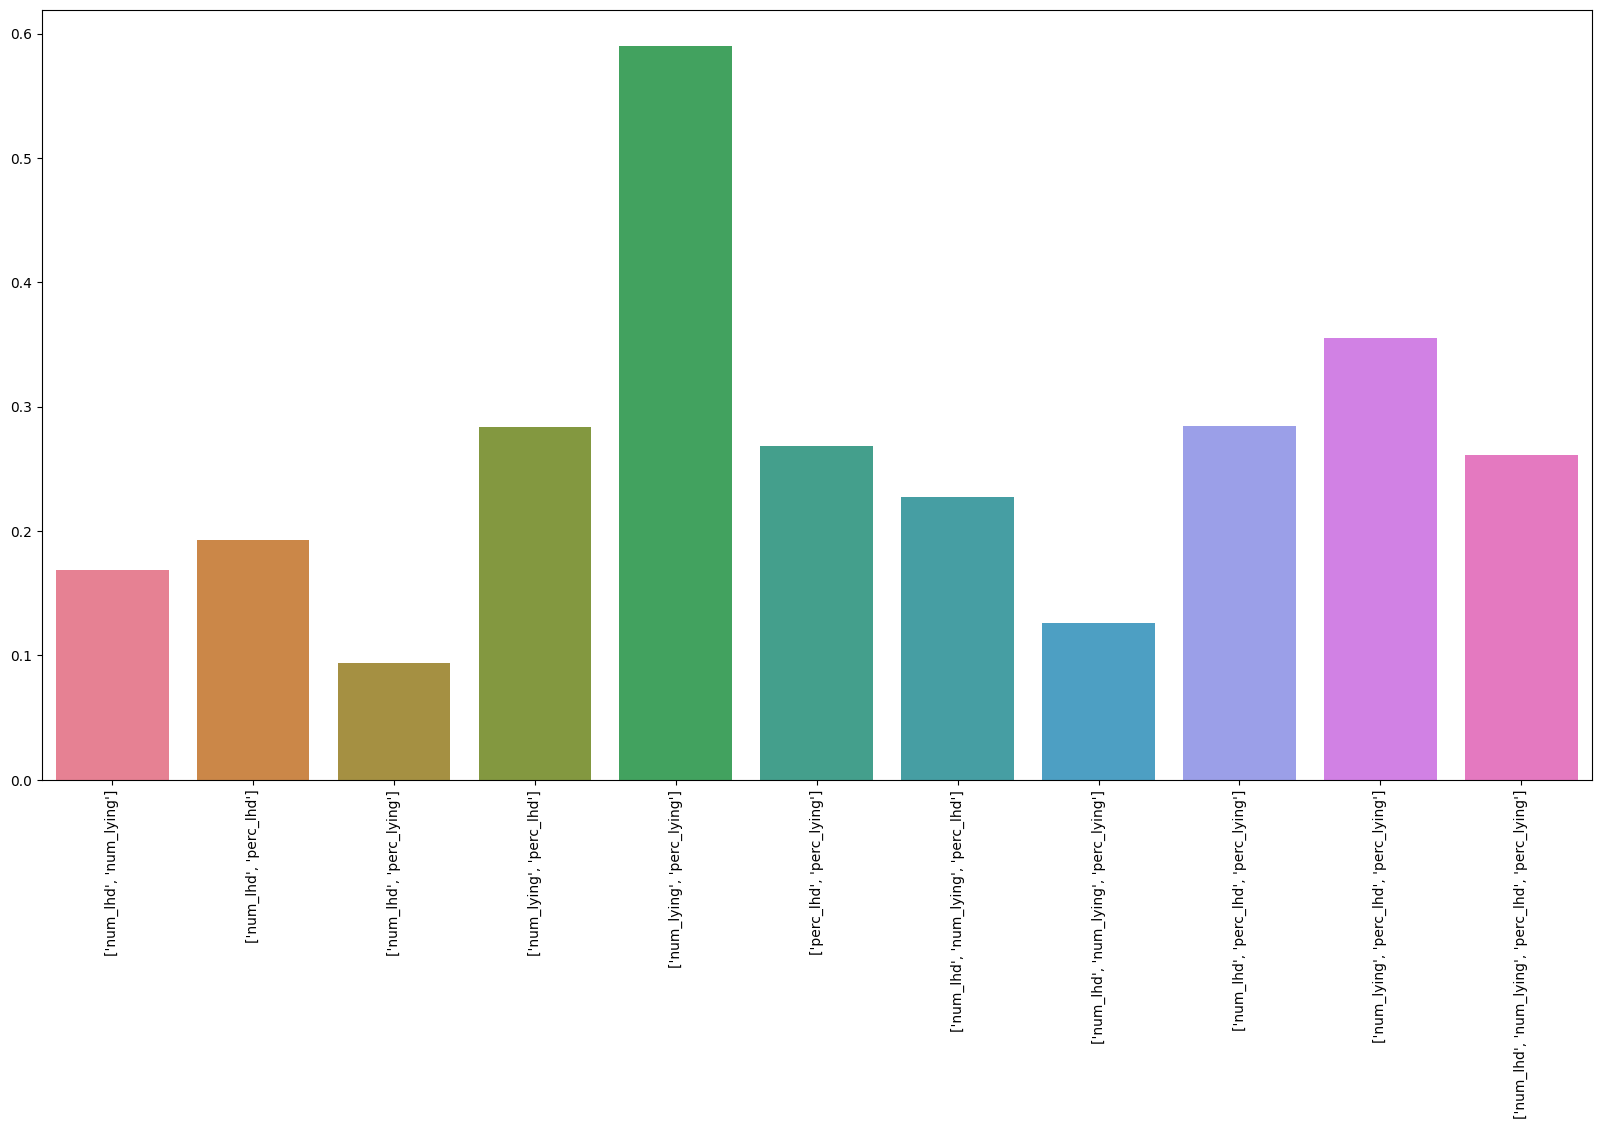

In [27]:
fig = plt.figure(figsize=(20, 10))
ax = sns.barplot(inv_result_dict)
ax.axes.xaxis.set_tick_params(rotation=90)

In [28]:
most_promising_result = result_dict[max(list(result_dict.keys()))]

In [31]:
most_promising_result

['num_lying', 'perc_lying']

In [30]:
fig.savefig('tst.pdf')

In [40]:
pd.DataFrame(inv_result_dict).T.rename(columns={0: 'Score'}).sort_values(by='Score', ascending=False)

,Score
"['num_lying', 'perc_lying']",0.589741
"['num_lying', 'perc_lhd', 'perc_lying']",0.355045
"['num_lhd', 'perc_lhd', 'perc_lying']",0.284477
"['num_lying', 'perc_lhd']",0.283887
"['perc_lhd', 'perc_lying']",0.268422
"['num_lhd', 'num_lying', 'perc_lhd', 'perc_lying']",0.261224
"['num_lhd', 'num_lying', 'perc_lhd']",0.227447
"['num_lhd', 'perc_lhd']",0.192692
"['num_lhd', 'num_lying']",0.168958
"['num_lhd', 'num_lying', 'perc_lying']",0.126113
